In [2]:
import pandas as pd

df = pd.read_csv("../Base.csv")

counts = df['fraud_bool'].value_counts()
majority = counts.max()
minority = counts.min()

imbalance_ratio = majority / minority
print("Majority class:", majority)
print("Minority class:", minority)
print("Imbalance Ratio (IR):", imbalance_ratio)


Majority class: 988971
Minority class: 11029
Imbalance Ratio (IR): 89.67005168192946


In [3]:
total = len(df)
minority_pct = (minority / total) * 100
print("Minority class percentage:", minority_pct)


Minority class percentage: 1.1029


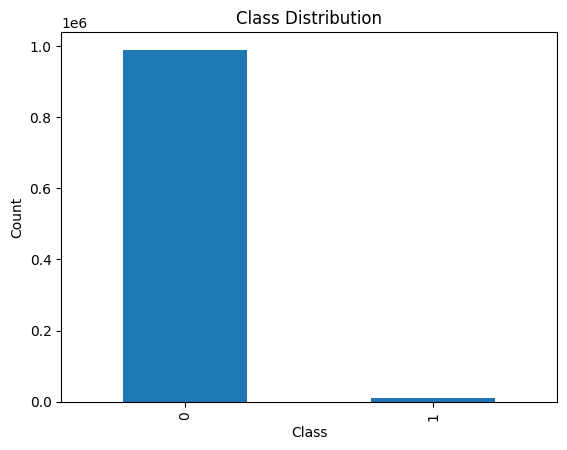

In [4]:
import matplotlib.pyplot as plt

df['fraud_bool'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC

# 1. Load dataset
df = pd.read_csv("../Base.csv")

# 2. Separate features and target
X = df.drop("fraud_bool", axis=1)
y = df["fraud_bool"]

# 3. Identify categorical columns (object, bool, category)
categorical_cols = X.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

# Convert to categorical codes (required for SMOTENC)
X_encoded = X.copy()
for col in categorical_cols:
    X_encoded[col] = X_encoded[col].astype('category').cat.codes

# 4. Train-test split BEFORE oversampling (important!)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Build categorical index list required by SMOTENC
categorical_idx = [X_train.columns.get_loc(col) for col in categorical_cols]

# 6. Apply SMOTENC to ONLY the training data
smote_nc = SMOTENC(
    categorical_features=categorical_idx,
    random_state=42,
    sampling_strategy="auto"   # Balance classes fully
)

X_resampled, y_resampled = smote_nc.fit_resample(X_train, y_train)

# 7. Check new class distribution
print("Before Oversampling:", y_train.value_counts())
print("\nAfter Oversampling:", y_resampled.value_counts())


Before Oversampling: 0    791177
1      8823
Name: fraud_bool, dtype: int64

After Oversampling: 0    791177
1    791177
Name: fraud_bool, dtype: int64


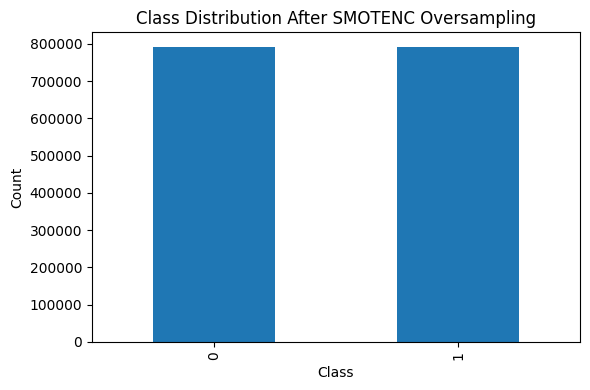

In [6]:
import matplotlib.pyplot as plt

# Plot class distribution after SMOTENC
plt.figure(figsize=(6,4))
y_resampled.value_counts().plot(kind='bar')

plt.title("Class Distribution After SMOTENC Oversampling")
plt.xlabel("Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
